# SFSC curve of empiar10311_stack_crop.mrc

In [1]:
import mrcfile # pip install mrcfil
import matplotlib.pyplot as plt # pip install matplotlib
from self_fourier_shell_correlation import fsc_utils as fsc # pip install --upgrade --force-reinstall "self_fourier_shell_correlation @ git+https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation"

In [2]:
vol_name = "empiar10311_stack_crop"
vol_extension = ".mrc"
vols_path = "/mnt2/TomogramDenoising/vols/"

In [3]:
from collections import namedtuple # Comes with the PSL
Args = namedtuple("args", ["vol"])
args = Args(vols_path + vol_name + vol_extension)

In [4]:
with mrcfile.open(args.vol, permissive=True) as mrc:
    vol= mrc.data

In [5]:
vol.shape

(100, 1024, 1024)

In [6]:
vol = vol[0:100, 0:100, 0:100]

In [7]:
#Z_dim = vol.shape[0]
#Z2 = Z_dim//2
#plt.imshow(vol[Z2], cmap="gray")

In [8]:
freq, c_avg = fsc.get_SFSC_curve(vol)

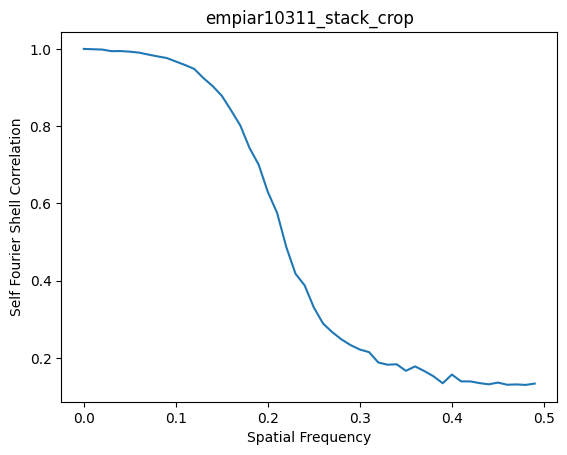

In [9]:
plt.title(vol_name)
plt.xlabel("Spatial Frequency")
plt.ylabel("Self Fourier Shell Correlation")
plt.plot(freq, c_avg)
plt.savefig(vol_name + ".svg")
plt.show()